In [ ]:
!pip uninstall -y langchain langchain-core langchain-community langchain-experimental

Found existing installation: langchain 0.3.27
Uninstalling langchain-0.3.27:
  Successfully uninstalled langchain-0.3.27
Found existing installation: langchain-core 0.3.79
Uninstalling langchain-core-0.3.79:
  Successfully uninstalled langchain-core-0.3.79


In [ ]:
!pip install -U langchain langchain-core==1.0 langchain-community langchain-experimental langchain_google_genai

INFO: pip is looking at multiple versions of langchain-experimental to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain-experimental to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
INFO: pip is looking at multiple versions of langchain to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of langchain to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. S

### Build a Simple Workflow or Graph Using LangGraph

**State**
First, define the State of the graph.

The State schema serves as the input schema for all Nodes and Edges in the graph.

Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [ ]:
from typing_extensions import TypedDict
class State(TypedDict):
    graph_info:str

**Nodes** :
Nodes are just python functions.

The first positional argument is the state, as defined above.

Because the state is a TypedDict with schema as defined above, each node can access the key, graph_state, with state['graph_state'].

Each node returns a new value of the state key graph_state.

By default, the new value returned by each node will override the prior state value.

In [ ]:
def start_play(state:State):
    print("Start_Play node has been called")
    return {"graph_info":state['graph_info'] + " I am planning to play"}

def cricket(state:State):
    print("My Cricket node has been called")
    return {"graph_info":state['graph_info'] + " Cricket"}

def badminton(state:State):
    print("My badminton node has been called")
    return {"graph_info":state['graph_info'] + " Badminton"}

In [ ]:
import random
from typing import Literal

def random_play(state:State)-> Literal['cricket','badminton']:
    graph_info=state['graph_info']

    if random.random()>0.5:
        return "cricket"
    else:
        return "badminton"

**Graph Construction**
Now, we build the graph from our components defined above.

The StateGraph class is the graph class that we can use.

First, we initialize a StateGraph with the State class we defined above.

Then, we add our nodes and edges.

We use the START Node, a special node that sends user input to the graph, to indicate where to start our graph.

The END Node is a special node that represents a terminal node.

Finally, we compile our graph to perform a few basic checks on the graph structure.

We can visualize the graph as a Mermaid diagram.

In [ ]:
!pip install langgraph

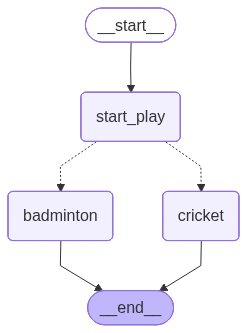

In [ ]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END

## Build Graph
graph=StateGraph(State)

## Adding the nodes
graph.add_node("start_play",start_play)
graph.add_node("cricket",cricket)
graph.add_node("badminton",badminton)

## Schedule the flow of the graph

graph.add_edge(START,"start_play")
graph.add_conditional_edges("start_play",random_play)
graph.add_edge("cricket",END)
graph.add_edge("badminton",END)

## Compile the graph
graph_builder=graph.compile()

## View
display(Image(graph_builder.get_graph().draw_mermaid_png()))

**GRAPH Invocation**

In [ ]:
graph_builder.invoke({"graph_info":"Hey My name is Alex"})

Start_Play node has been called
My Cricket node has been called


{'graph_info': 'Hey My name is Alex I am planning to play Cricket'}

### ReAct Agent Architecture

#### Aim
This is the intuition behind ReAct, a general agent architecture.

1. act - let the model call specific tools
2. observe - pass the tool output back to the model
3. reason - let the model reason about the tool output to decide what to do next (e.g., call another tool or just respond directly)


In [ ]:
#!pip install langchain
#!pip install langchain-community
#!pip install langchain_google_genai

import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"]=userdata.get('gemini_key')
#genai.configure(api_key=userdata.get('gemini_key'))

from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [ ]:
!pip install arxiv

api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)
print(arxiv.name)

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 2.8 MB/s eta 0:00:00
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6046 sha256=0cb889f03e7ac19166096103edf6c08cc716ce691be0b5731e5bf2f89569a4a2
  Stored in directory: /root/.cache/pip/wheels/03/f5/1a/23761066dac1d0e8e683e5fdb27e12de53209d05a4a37e6246
Successfully built sgmllib3k
arxiv


In [ ]:
arxiv.invoke("Attention iss all you need")

"Published: 2024-07-22\nTitle: Attention Is All You Need But You Don't Need All Of It For Inference of Large Language Models\nAuthors: Georgy Tyukin, Gbetondji J-S Dovonon, Jean Kaddour, Pasquale Minervini\nSummary: The inference demand for LLMs has skyrocketed in recent months, and serving\nmodels with low latencies remains challenging due to the quadratic input length\ncomplexity of the attention layers. In this work, we investigate the effect of\ndropping MLP and attention layers at inference time o"

In [ ]:
!pip install wikipedia

api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)
wiki.name

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11678 sha256=070a9bccae8cd9fe1d280680857739ad2ccef2ea5cd12cc97547e73ccd0b1118
  Stored in directory: /root/.cache/pip/wheels/63/47/7c/a9688349aa74d228ce0a9023229c6c0ac52ca2a40fe87679b8
Successfully built wikipedia


'wikipedia'

In [ ]:
wiki.invoke("What is machine learning")

'Page: Machine learning\nSummary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.\nML fi'

In [ ]:
### Custom Functions
def multiply(a: int, b: int) -> int:
    """Multiply a and b.

    Args:
        a: first int
        b: second int
    """
    return a * b

# This will be a tool
def add(a: int, b: int) -> int:
    """Adds a and b.

    Args:
        a: first int
        b: second int
    """
    return a + b

def divide(a: int, b: int) -> float:
    """Divide a and b.

    Args:
        a: first int
        b: second int
    """
    return a / b


In [ ]:
os.environ["TAVILY_API_KEY"]=userdata.get('tavily_key')

### Tavily Search Tool
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

/tmp/ipython-input-321048985.py:6: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the `langchain-tavily package and should be used instead. To use it run `pip install -U `langchain-tavily` and import as `from `langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [ ]:
tavily.invoke("Provide me the recent AI news for march 3rd 2025")

[{'title': 'Daily AI Agent News - March 2025',
  'url': 'https://aiagentstore.ai/ai-agent-news/2025-march',
  'content': 'March 3, 2025 — Today marked significant advancements in AI agent development, with major players unveiling cutting-edge innovations. At Mobile World Congress 2025, Samsung showcased its expanded Galaxy AI ecosystem, including the Galaxy S25 Edge—the slimmest device in the series—and Project Moohan, its first XR headset. The company highlighted AI-driven health features like Energy Score and Sleep Insights, which integrate with SmartThings for personalized wellness management. [...] OpenAI’s o3 model continues to dominate scientific problem-solving benchmarks, while Meta’s AI-driven productivity tools reportedly reduced HR case resolution times by 36%. Meanwhile, Elon Musk’s Grok 3 entered final testing, promising unprecedented reasoning capabilities for consumer-facing applications. [...] Meanwhile, Sam Altman highlighted OpenAI\'s recent scientific milestones, cal

In [ ]:
### Combine all the tools in the list

tools=[arxiv,wiki,tavily,add,divide,multiply]

In [ ]:
## Initialize my LLM model

from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-lite")

llm_with_tools=llm.bind_tools(tools)

In [ ]:
from pprint import pprint
from langchain_core.messages import AIMessage, HumanMessage
llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")])

AIMessage(content='', additional_kwargs={'function_call': {'name': 'tavily_search_results_json', 'arguments': '{"query": "recent AI news"}'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash-lite', 'safety_ratings': [], 'grounding_metadata': {}, 'model_provider': 'google_genai'}, id='lc_run--7b148ec5-a95d-408a-b614-3462ab671b12-0', tool_calls=[{'name': 'tavily_search_results_json', 'args': {'query': 'recent AI news'}, 'id': '7eb8cc67-b06f-4633-9f01-05c2bcf20855', 'type': 'tool_call'}], usage_metadata={'input_tokens': 214, 'output_tokens': 12, 'total_tokens': 226, 'input_token_details': {'cache_read': 0}})

In [ ]:
#llm_with_tools.invoke([HumanMessage(content=f"What is the recent AI News")]).tool_calls
#llm_with_tools.invoke([HumanMessage(content=f"What is the theory of relativity")]).tool_calls
#llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 2?")]).tool_calls
llm_with_tools.invoke([HumanMessage(content=f"top 2 articles on psychoanalysis")]).tool_calls

[{'name': 'arxiv',
  'args': {'query': 'psychoanalysis'},
  'id': '6b453b30-f4e1-47c7-9e2d-728f1479da4a',
  'type': 'tool_call'}]

In [ ]:
## State Schema
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

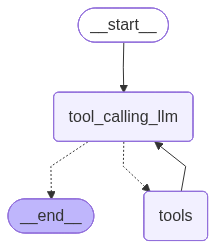

In [ ]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools","tool_calling_llm")


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
messages=graph.invoke({"messages":HumanMessage(content="Provide me the top 10 recent AI news for MArch 3rd 2025,add 5 plus 5 and then multiply by 10")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Provide me the top 10 recent AI news for MArch 3rd 2025,add 5 plus 5 and then multiply by 10
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (6947acc2-6cb4-4ccc-aa02-e37f7157036b)
 Call ID: 6947acc2-6cb4-4ccc-aa02-e37f7157036b
  Args:
    query: top 10 AI news March 3rd 2025
  add (c0b4b346-80cb-481d-a967-34faf9f3a208)
 Call ID: c0b4b346-80cb-481d-a967-34faf9f3a208
  Args:
    a: 5
    b: 5
  multiply (8d9a25c8-4f32-47b0-931c-13646de33f9f)
 Call ID: 8d9a25c8-4f32-47b0-931c-13646de33f9f
  Args:
    a: 10
    b: 10
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "Top Viral AI & Tech News (March 3 - March 7, 2025)", "url": "https://www.youtube.com/watch?v=n0icz4P221E", "content": "guys so china has an ai breakthrough with a company called a startup called mon

In [ ]:
messages=graph.invoke({"messages":HumanMessage(content="What is machine learning")})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

What is machine learning
================================== Ai Message ==================================
Tool Calls:
  wikipedia (254fbb9f-1af5-4a54-94ea-021d780cc7ec)
 Call ID: 254fbb9f-1af5-4a54-94ea-021d780cc7ec
  Args:
    query: machine learning
================================= Tool Message =================================
Name: wikipedia

Page: Machine learning
Summary: Machine learning (ML) is a field of study in artificial intelligence concerned with the development and study of statistical algorithms that can learn from data and generalise to unseen data, and thus perform tasks without explicit instructions. Within a subdiscipline in machine learning, advances in the field of deep learning have allowed neural networks, a class of statistical algorithms, to surpass many previous machine learning approaches in performance.
ML fi
================================== Ai Message =====================